In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [2]:
#0-monday

In [3]:
df = pd.read_csv('bank_nifty.csv')

In [4]:
nifty = pd.read_csv('bank_nifty.csv')

In [5]:
nifty


,name,date,time,open,high,low,close
0,BANKNIFTY,2010-03-02,09:01:00,8826.90,8856.95,8826.90,8839.80
1,BANKNIFTY,2010-03-02,09:02:00,8840.75,8853.90,8832.80,8852.30
2,BANKNIFTY,2010-03-02,09:03:00,8855.70,8855.70,8844.65,8846.65
3,BANKNIFTY,2010-03-02,09:04:00,8843.85,8850.70,8843.75,8846.70
4,BANKNIFTY,2010-03-02,09:05:00,8846.40,8846.40,8837.75,8841.60
...,...,...,...,...,...,...,...
1037382,BANKNIFTY,2021-04-30,15:28:00,32737.45,32741.95,32722.90,32725.95
1037383,BANKNIFTY,2021-04-30,15:29:00,32730.90,32733.65,32713.35,32718.80
1037384,BANKNIFTY,2021-04-30,15:30:00,32715.90,32726.20,32706.25,32714.35
1037385,BANKNIFTY,2021-04-30,15:31:00,32724.90,32724.90,32724.90,32724.90


In [6]:
nifty.date = pd.to_datetime(nifty.date)

In [7]:
nifty.time = pd.to_datetime(nifty.time).dt.time

In [8]:
nifty['year'] = nifty.date.dt.year
nifty['month'] = nifty.date.dt.month
nifty['day'] = nifty.date.dt.day
nifty['dayofweek'] = nifty.date.dt.dayofweek

In [9]:
nifty['lag'] = nifty.close.shift(1)

In [10]:
nifty.dropna(axis=0, inplace =True)

In [11]:
nifty['r'] = (nifty.close/nifty.lag - 1)*100

In [12]:
nifty.r

1          0.141406
2         -0.063825
3          0.000565
4         -0.057649
5         -0.053158
             ...   
1037382   -0.033296
1037383   -0.021848
1037384   -0.013601
1037385    0.032249
1037386    0.173874
Name: r, Length: 1037386, dtype: float64

In [13]:
#Filter thurday 3:15 data points
new = nifty[(nifty.dayofweek == 3) & (nifty.time == datetime.time(15,15))]

In [14]:
#calculate returns i.e one thurday from 3:15 PM to next thurday 3:15 PM
new['ret'] = (new.close/new.close.shift(1) - 1)*100

/var/folders/36/2w68f_916m5_4nk8vnz8j2yw0000gn/T/ipykernel_2401/2312379241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['ret'] = (new.close/new.close.shift(1) - 1)*100


In [15]:
new.dropna(axis = 0, inplace =True)

/Users/shivams/miniconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [64]:
#Data which is beyond 1 stdv from mean on positive side of distribution = 12.59%
new[(new.ret >= new.ret.mean()+1*new.ret.std())].shape[0]/new.shape[0]

0.1259124087591241

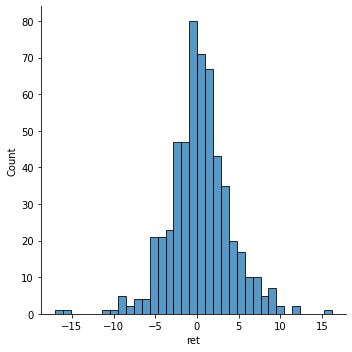

In [20]:
sns.displot(new.ret)

In [66]:
#A bit Negatively skewed
#Kurtosis approximately equal to normal which is 3
print(f'Mean->{new.ret.mean()}\nStandarad deviation->{new.ret.std()}\nSkewness->{new.ret.skew()}\nKurtosis->{new.ret.kurt()}')

Mean->0.3080266047442923
Standarad deviation->3.6543515670217723
Skewness->-0.077971161422943
Kurtosis->2.312016767768807


In [23]:
import random
import scipy
from scipy.stats import ttest_1samp

In [52]:
ps = []
for i in range(100, 548, 10):
    ret_sample = np.random.choice(new['ret'], i)
    ttest, pvalue = ttest_1samp(ret_sample, 0.3080)
    ps.append(pvalue)
    

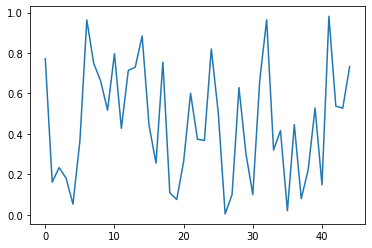

In [54]:
#Why the p value goes down sometimes?
plt.plot(ps)

In [58]:
#Avergae p value comes out to be 45% for different sizes of random samples which suggest that our null 
#hypothesis that our mean is 0.3080 is not rejected
sum(ps)/len(ps)

0.45532618093980404

In [67]:
#Sample stdv is almost similar
ret_sample.std()

3.530204615487306

In [60]:
#74.45% of data is in between 1 stdv from the mean i.e (mean-stdv,  mean+stdv)
new[(new.ret <= new.ret.mean() + new.ret.std()) & (new.ret >= new.ret.mean() - new.ret.std()) ].shape[0]/new.shape[0]

0.7445255474452555

In [61]:
#94.52% of data is in between 2 stdv from the mean i.e (mean - 2*stdv,  mean + 2*stdv)
new[(new.ret <= new.ret.mean() + 2*new.ret.std()) & (new.ret >= new.ret.mean() - 2*new.ret.std()) ].shape[0]/new.shape[0]

0.9452554744525548

In [62]:
#98.90% of data is in between 3 stdv from the mean
new[(new.ret <= new.ret.mean() + 3*new.ret.std()) & (new.ret >= new.ret.mean() - 3*new.ret.std()) ].shape[0]/new.shape[0]

0.9890510948905109

In [63]:
#99.45% of data is in between 4 stdv from the mean
new[(new.ret <= new.ret.mean() + 4*new.ret.std()) & (new.ret >= new.ret.mean() - 4*new.ret.std()) ].shape[0]/new.shape[0]

0.9945255474452555

In [69]:
current_spot = 17200 #for nifty
#74.45% chances that spot will remain in this range over next week thurday 3:15
(17200*(1 - (new.ret.mean() + new.ret.std())/100), 17200*(1 + (new.ret.mean() + new.ret.std())/100))

(16518.470954456236, 17881.52904554376)

In [70]:

#94.52% chances that spot will remain in this range over next week thurday 3:15
(17200*(1 - (new.ret.mean() + 2*new.ret.std())/100), 17200*(1 + (new.ret.mean() + 2*new.ret.std())/100))

(15889.922484928491, 18510.07751507151)